In [20]:
import numpy as np
import pandas as pd
import struct
from matplotlib import pyplot as plt
%matplotlib inline

In [33]:
npxor = np.frompyfunc(np.bitwise_xor, 2, 1)

In [42]:
def lzc(t):
    return 32 - len(np.binary_repr(t))
lzcv = np.frompyfunc(lzc, 1, 1)

In [34]:
def to_u32(f):
    s = struct.pack('>f',f)
    return struct.unpack('>l', s)[0]
to_u32v = np.frompyfunc(to_u32, 1, 1)

In [89]:
mu = np.arange(1000)
omega = mu*.20
omega2 = mu*.10
omega3 = mu*.05
omega4 = mu*.01

In [90]:
def mean_lzc(m, o):
    dist = np.random.normal(m,o,size=1000)
    truth = to_u32(m)
    vals = to_u32v(dist)
    xors = npxor(vals, truth)
    lzcs = lzcv(xors)
    return lzcs.mean()

In [91]:
result = [mean_lzc(m,o) for m,o in zip(mu,omega)]
result2 = [mean_lzc(m,o) for m,o in zip(mu,omega2)]
result3 = [mean_lzc(m,o) for m,o in zip(mu,omega3)]
result4 = [mean_lzc(m,o) for m,o in zip(mu,omega4)]

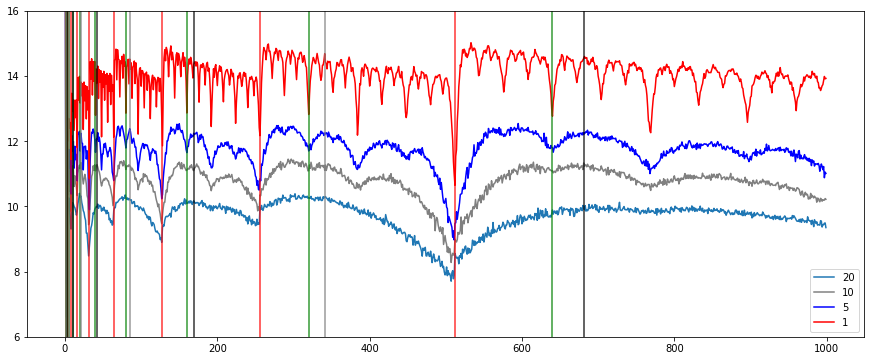

In [108]:
pd.Series(result).plot(figsize=(15,6), ylim=(6,16), label='20');
pd.Series(result2).plot(figsize=(15,6), ylim=(6,16), color='grey', label='10');
pd.Series(result3).plot(figsize=(15,6), ylim=(6,16), color='blue', label='5');
pd.Series(result4).plot(figsize=(15,6), ylim=(6,16), color='red', label='1');
[plt.axvline(2**x, color='red', alpha=.8) for x in range(10)];
# [plt.axvline(2**x*1.5, color='grey', alpha=.2) for x in range(10)];
[plt.axvline(2**x*1.25, color='green', alpha=.8) for x in range(10)];
[plt.axvline(int("10"*x, 2), color='black', alpha=.8) for x in range(1,6)];
[plt.axvline(int("01"*x, 2), color='grey', alpha=.8) for x in range(1,6)];
plt.legend();